### Linear Regression with loss as Mean Absolute Error - with Analytic & PyTorch

Autograd MAE Parameters: w = 2.5974, b = 4.5317
Manual MAE Parameters:   w = 2.5933, b = 4.5568


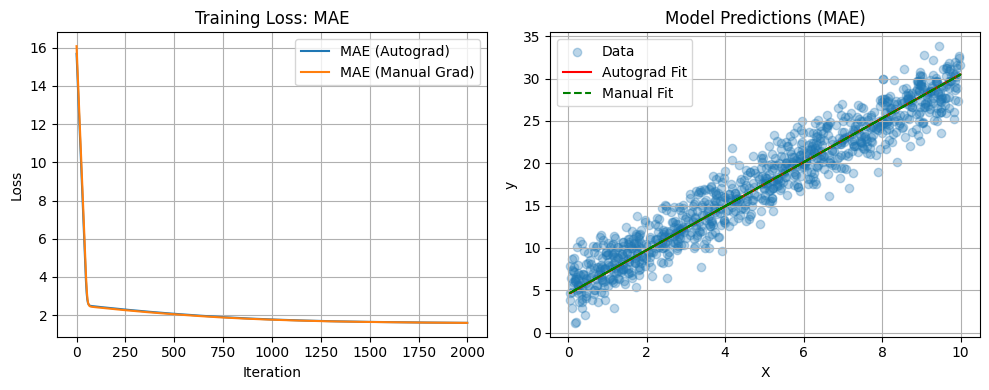

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Set random seeds
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic data
m = 1000
X_np = np.random.rand(1, m) * 10
noise = np.random.randn(1, m) * 2
y_np = 2.5 * X_np + 5 + noise

# Convert to tensors
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32)

# Hyperparameters
alpha = 0.01
n_iter = 2000

# 1. MAE with autograd
def train_mae_autograd(X, y):
    w = torch.randn(1, 1, requires_grad=True)
    b = torch.randn(1, 1, requires_grad=True)

    losses = []

    for _ in range(n_iter):
        z = w @ X + b
        loss = torch.sum(torch.abs(z - y)) / m
        losses.append(loss.item())

        loss.backward()

        with torch.no_grad():
            w -= alpha * w.grad
            b -= alpha * b.grad

        w.grad.zero_()
        b.grad.zero_()

    return losses, w.detach(), b.detach()

# 2. MAE with manual gradients
def train_mae_manual(X, y):
    w = torch.randn(1, 1, dtype=torch.float32)
    b = torch.randn(1, 1, dtype=torch.float32)

    losses = []

    for _ in range(n_iter):
        z = w @ X + b
        loss = torch.sum(torch.abs(z - y)) / m
        grad_z = torch.sign(z - y) / m

        grad_w = grad_z @ X.T
        grad_b = torch.sum(grad_z, dim=1, keepdim=True)

        w -= alpha * grad_w
        b -= alpha * grad_b

        losses.append(loss.item())

    return losses, w, b

# Train both models
losses_autograd, w_auto, b_auto = train_mae_autograd(X, y)
losses_manual, w_manual, b_manual = train_mae_manual(X, y)

# Print final parameters
print(f"Autograd MAE Parameters: w = {w_auto.item():.4f}, b = {b_auto.item():.4f}")
print(f"Manual MAE Parameters:   w = {w_manual.item():.4f}, b = {b_manual.item():.4f}")

# Plot losses
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(losses_autograd, label='MAE (Autograd)')
plt.plot(losses_manual, label='MAE (Manual Grad)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss: MAE')
plt.legend()
plt.grid(True)

# Plot predictions
X_plot = X_np.flatten()
y_true = y_np.flatten()
y_pred_auto = (w_auto.item() * X_plot + b_auto.item())
y_pred_manual = (w_manual.item() * X_plot + b_manual.item())

plt.subplot(1, 2, 2)
plt.scatter(X_plot, y_true, label='Data', alpha=0.3)
plt.plot(X_plot, y_pred_auto, label='Autograd Fit', color='red')
plt.plot(X_plot, y_pred_manual, label='Manual Fit', color='green', linestyle='--')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model Predictions (MAE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
